In [39]:
#https://www.youtube.com/watch?v=SslzS0AsiAw
import os
ROOT_DIR = os.getcwd()
print("Curr Dir : ", ROOT_DIR)
# !ls -lh

if not os.path.exists("FastSAM"):
    !git clone https://github.com/CASIA-IVA-Lab/FastSAM.git
    !pip3 -q install -r FastSAM/requirements.txt
# install CLIP
!pip3 -q install git+https://github.com/openai/CLIP.git
# install other dependencies
!pip3 -q install roboflow supervision jupyter_bbox_widget opencv-python
if not os.path.exists("weights/FastSAM.pt"):
    !mkdir -p weights
    !wget -P weights -q https://huggingface.co/spaces/An-619/FastSAM/resolve/main/weights/FastSAM.pt
    


Curr Dir :  /home/avishkar/Desktop/projects/panoptic_segmentation


In [40]:
%cd FastSAM
from fastsam import FastSAM, FastSAMPrompt
import torch
import numpy as np
import cv2
import time
import supervision as sv
%cd ..

/home/avishkar/Desktop/projects/panoptic_segmentation/FastSAM
/home/avishkar/Desktop/projects/panoptic_segmentation


In [41]:
FASTSAM_CHECKPT = "weights/FastSAM.pt"
DEVICE = torch.device('cuda' if torch.cuda.is_available() else "cpu")

model = FastSAM(FASTSAM_CHECKPT)

In [42]:
def annotate_image(image_path: str, masks: np.ndarray) -> np.ndarray:
    image = cv2.imread(image_path)

    xyxy = sv.mask_to_xyxy(masks=masks)
    # print(xyxy.shape)
    # print(class_id)
    detections = sv.Detections(xyxy=xyxy, mask=masks)

    mask_annotator = sv.MaskAnnotator(color_lookup = sv.ColorLookup.INDEX)
    return mask_annotator.annotate(scene=image.copy(), detections=detections)

In [ ]:
!git clone https://github.com/AvishkarArjan/panoptic-segmentation.git
if not os.path.exists(data):
    !mkdir data
!cp panoptic-segmentation/data/test_vid.mp4 data/test_vid.mp4


0: 1024x576 153 objects, 1416.1ms
Speed: 2.7ms preprocess, 1416.1ms inference, 202.8ms postprocess per image at shape (1, 3, 1024, 1024)


Masks shape: torch.Size([153, 850, 478])
Boxes shape: torch.Size([153, 6])


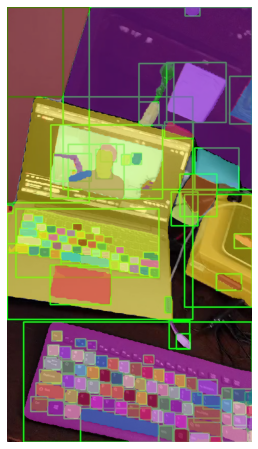


0: 1024x576 158 objects, 1567.6ms
Speed: 2.8ms preprocess, 1567.6ms inference, 206.6ms postprocess per image at shape (1, 3, 1024, 1024)


Masks shape: torch.Size([158, 850, 478])
Boxes shape: torch.Size([158, 6])


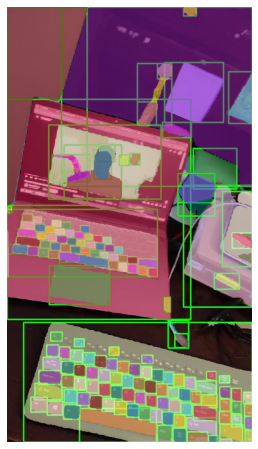


0: 1024x576 115 objects, 1692.9ms
Speed: 6.4ms preprocess, 1692.9ms inference, 172.7ms postprocess per image at shape (1, 3, 1024, 1024)


Masks shape: torch.Size([115, 850, 478])
Boxes shape: torch.Size([115, 6])


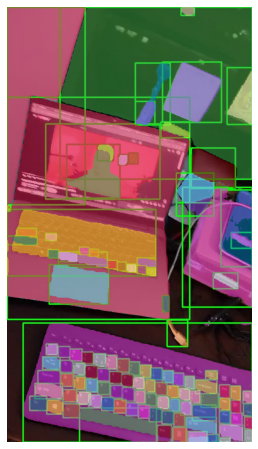


0: 1024x576 71 objects, 1446.6ms
Speed: 3.4ms preprocess, 1446.6ms inference, 98.8ms postprocess per image at shape (1, 3, 1024, 1024)


Masks shape: torch.Size([71, 850, 478])
Boxes shape: torch.Size([71, 6])


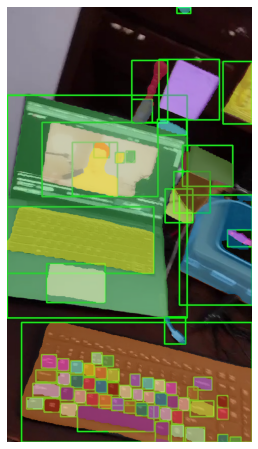


0: 1024x576 79 objects, 1458.5ms
Speed: 7.2ms preprocess, 1458.5ms inference, 117.9ms postprocess per image at shape (1, 3, 1024, 1024)


Masks shape: torch.Size([79, 850, 478])
Boxes shape: torch.Size([79, 6])


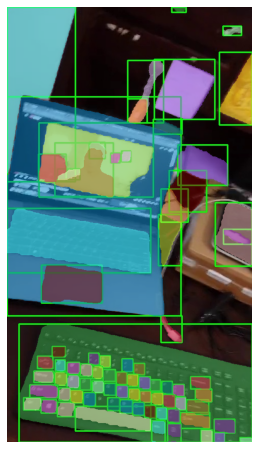


0: 1024x576 49 objects, 1483.2ms
Speed: 7.4ms preprocess, 1483.2ms inference, 88.6ms postprocess per image at shape (1, 3, 1024, 1024)


Masks shape: torch.Size([49, 850, 478])
Boxes shape: torch.Size([49, 6])


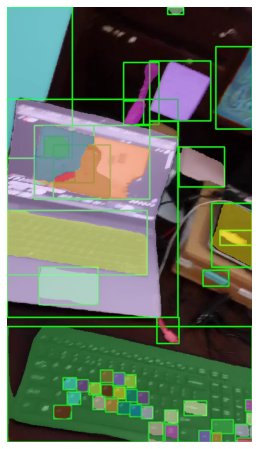


0: 1024x576 42 objects, 1569.0ms
Speed: 3.8ms preprocess, 1569.0ms inference, 48.3ms postprocess per image at shape (1, 3, 1024, 1024)


Masks shape: torch.Size([42, 850, 478])
Boxes shape: torch.Size([42, 6])


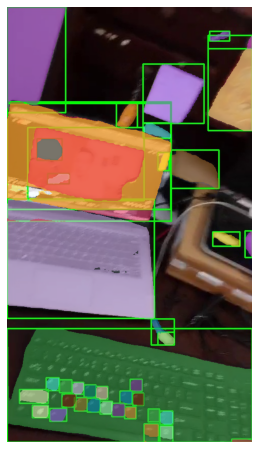


0: 1024x576 40 objects, 1496.5ms
Speed: 2.9ms preprocess, 1496.5ms inference, 46.1ms postprocess per image at shape (1, 3, 1024, 1024)


Masks shape: torch.Size([40, 850, 478])
Boxes shape: torch.Size([40, 6])


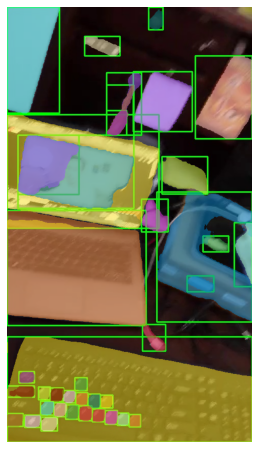


0: 1024x576 47 objects, 1515.5ms
Speed: 6.0ms preprocess, 1515.5ms inference, 58.7ms postprocess per image at shape (1, 3, 1024, 1024)


Masks shape: torch.Size([47, 850, 478])
Boxes shape: torch.Size([47, 6])


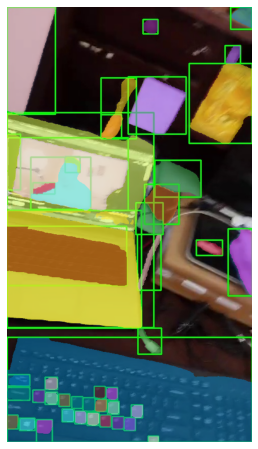


0: 1024x576 24 objects, 1870.9ms
Speed: 3.8ms preprocess, 1870.9ms inference, 36.5ms postprocess per image at shape (1, 3, 1024, 1024)


Masks shape: torch.Size([24, 850, 478])
Boxes shape: torch.Size([24, 6])


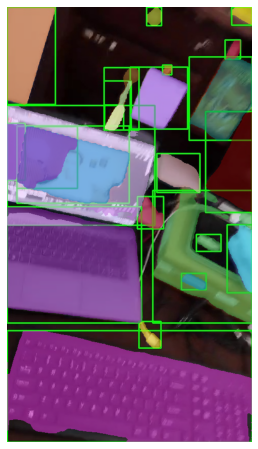


0: 1024x576 95 objects, 1896.4ms
Speed: 4.0ms preprocess, 1896.4ms inference, 169.2ms postprocess per image at shape (1, 3, 1024, 1024)


Masks shape: torch.Size([95, 850, 478])
Boxes shape: torch.Size([95, 6])


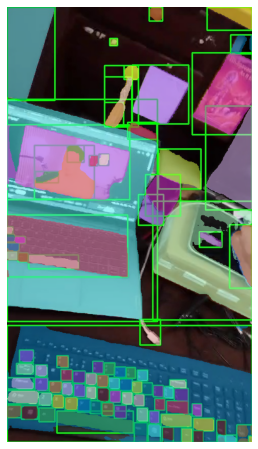


0: 1024x576 37 objects, 1922.5ms
Speed: 3.4ms preprocess, 1922.5ms inference, 63.7ms postprocess per image at shape (1, 3, 1024, 1024)


Masks shape: torch.Size([37, 850, 478])
Boxes shape: torch.Size([37, 6])


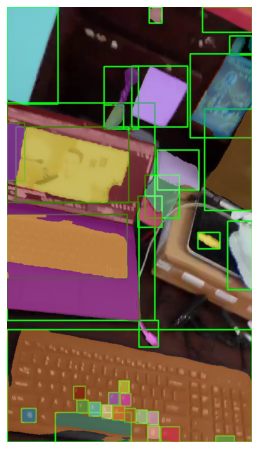

KeyboardInterrupt: 

In [48]:
cap = cv2.VideoCapture("data/test_vid.mp4")
out_vid = []
while True:
    ret, frame = cap.read()
    height, width, layers = frame.shape
    start = time.perf_counter()

    everything_results = model(
        source = frame,
        device = DEVICE,
        retina_masks = True,
        imgsz=1024,
        conf=0.4,
        iou=0.9
    )

    print(f"Masks shape: {everything_results[0].masks.shape}")
    print(f"Boxes shape: {everything_results[0].boxes.shape}")
    # print(f"xyxy shape: {everything_results[0].boxes[0].xyxy.cpu().numpy()}")

    for box in everything_results[0].boxes:
        box=box.xyxy.cpu().numpy()[0]
        # print(box)
        cv2.rectangle(frame, (int(box[0]), int(box[1])), (int(box[2]) , int(box[3])), (0,255,0), 2)
    # cv2.imwrite("./output/testx.jpg", frame)

    cv2.imwrite("./output/frame_test.jpg", frame)

    prompt_process = FastSAMPrompt( frame , everything_results, device=DEVICE)
    masks = prompt_process.everything_prompt()
    prompt_process.plot(annotations=masks, output_path = "./output/test.jpg")

    end = time.perf_counter()
    total_time = end-start
    fps = 1/total_time


    masks = masks.cpu().numpy().astype(bool)
    annotated_image=annotate_image(image_path="./output/frame_test.jpg", masks=masks)
    sv.plot_image(image=annotated_image, size=(8, 8))
    out_vid.append(annotated_image)
    # cv2.putText(img, f"FPS: {int(fps)}", (20,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0) ,2)
    # out_vid.append(img)


    # cv2.imshow('frame', frame)
    # cv2.imshow('img', img)

    # if cv2.waitKey(40) & 0xFF == ord('q'):
    #     break
# video = cv2.VideoWriter("panoptic_output.mp4", 0, 30, (width,height))
# for image in out_vid:
#     video.write(image)
# video.release()
# cap.release()



In [ ]:
# !pip uninstall opencv-python opencv-python-headless
# !pip install opencv-python

import os
from google.colab.patches import cv2_imshow
print(os.getcwd())
print(len(out_vid))
cv2_imshow(out_vid[0])


height,width, layerws = out_vid[0].shape
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('panoptic_output.avi', fourcc, 30, (width, height))
# video = cv2.VideoWriter("panoptic_output.mp4", 0, 30, (width,height))
for image in out_vid:
    out.write(image)

cv2.destroyAllWindows()
out.release()

print("Video Generated !")

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

if not os.path.exists(vid_out_path):
  !mkdir /content/drive/MyDrive/panoptic_output

!cp "panoptic_output.avi" "/content/drive/MyDrive/panoptic_output"